In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("person_info.csv")

In [4]:
data

,first_name,last_name,birthday,age,state,address,City,phone,email,car_1,gpa,year,class_of,online_signiture
0,Carol,Davis,9/29/1996,23,Illinois,1674 Carolyns Circle,"Burr Ridge, Illinois(IL), 60527",312-295-1941,curt1995@gmail.com,6ZUA618,2.85,1,2022,Don't aim for success if you want it just do w...
1,Bruno,Horan,6/11/1995,24,California,1561 Still Street,"San Diego, California(CA), 92111",858-449-3324,guadalupe1974@yahoo.com,982KRK,3.47,2,2021,"In any investment, you expect to have fun and ..."
2,William,Moody,2/27/1997,22,Illinois,541 Jade wood Drive,"Arlington Heights, Illinois(IL), 60004",979-614-4038,roosevelt.fee@hotmail.com,PS9-S917,2.78,2,2021,It's not my fault that people don't appreciate...
3,Robin,Steel,8/3/1989,57,Texas,1674 Caroly ns Circle,"Josephine, Texas(TX), 75173",214-694-7864,lloyd2009@hotmail.com,na,4.33,4,2019,The press is the hired agent of a monied system
4,Michelle,Roberts,7/17/1995,24,Oregon,1372 Gateway Road,"Portland, Oregon(OR), 97217\n\n",503-283-2255,ben1972@gmail.com,6XNK620,3.75,NaN,2019,I am desperate for change - now - not in 8 yea...
5,June,Sneed,3/27/2000,19,Arizona,2411 Clarksburg Park Road,"Phoenix, Arizona(AZ), 85003",256-286-5628,kathlyn_runolf@yahoo.com,NaN,3.60,Jr,2021,Civilization is the progress toward a society ...
6,Curtis,Campbell,3/15/1991,28,Idahol,2760 Science Center Drive,"Pocatello, Idaho(ID), 83201",979-614-4038,justen_schust@yahoo.com,PS9-S917,2.32,3,2020,I have an incredible amount of basketball know...
7,Dorothy,Schott,1/2/1997,21,California,2742 Sunny Day Drive,"Santa Ana, California(CA), 92770",501-281-4074,megane_purd1@hotmail.com,NaN,3.93,NaN,2020,A lawyer with his briefcase can steal more tha...
8,Mae,Skinner,3/16/1995,24,Pennsylvania,NaN,"Newark, Pennsylvania(PA), 19714",501-334-8502,enrique.berni@gmail.com,WCE-2823,3.85,3,2020,When humor can be made to alternate with melan...
9,David,Victoria,8/2/1996,23,Maine,3327 Chipmunk Lane,"Harpswell, Maine(ME), 04079",207-570-1895,carolina1977@hotmail.com,VDS-5639,1.74,S,2021,The difference between a beautifully made fail...


### How to Check & Clean Missing Values / NA using Python? | A1001

#### Check Missing Values

Let's look at the `car_1` column of the data. `car_1` should be a column of car license, but there are several missing values, denoted in different notations. 

In python, all the automatically defined missing values are denoted as `np.nan` (`NaN` in the data table in Jupyter Notebook and empty space in Excel). Also, `n/a` is automatically converted to `np.nan` by python. You can check this using:

In [5]:
data.car_1.isna()

0    False
1    False
2    False
3    False
4    False
5     True
6    False
7     True
8    False
9    False
Name: car_1, dtype: bool

In [6]:
data.car_1.isnull()

0    False
1    False
2    False
3    False
4    False
5     True
6    False
7     True
8    False
9    False
Name: car_1, dtype: bool

#### Summary the missing values' status

From 0 to 9, each number above matches a row. We can see from the output above that, there are missing values on positions 5 and 7 are missing. Both the two functions, `isna` and `isnull` have the same output.

In [9]:
data.isna().sum()

first_name          0
last_name           0
birthday            0
age                 0
state               0
address             1
City                0
phone               0
email               0
car_1               2
gpa                 0
year                2
class_of            0
online_signiture    0
dtype: int64

In [8]:
data.isnull().sum()

first_name          0
last_name           0
birthday            0
age                 0
state               0
address             1
City                0
phone               0
email               0
car_1               2
gpa                 0
year                2
class_of            0
online_signiture    0
dtype: int64

If we want to check the 

In [11]:
data.isnull().values.any()

True

In [12]:
data.isnull().sum().sum()

5

#### Check 'Irregular' Missing Values

We also want to find the "irregular" missing values. For here we can create a list of possible missing value options (this list can be customized based of specific projects):

In [5]:
irr = ["na", "n/a", "NA", "N/A"]

Then we impute the "irregular" missing values to `np.nan`:

In [20]:
data.car_1 = data.car_1.apply(lambda x: np.nan if x in irr else x)

In [21]:
data.car_1

0     6ZUA618
1      982KRK
2    PS9-S917
3         NaN
4     6XNK620
5         NaN
6    PS9-S917
7         NaN
8    WCE-2823
9    VDS-5639
Name: car_1, dtype: object

#### Clean Missing Values

Finally, we can use various ways to convert the missing values to more desirable values. Sometimes, in digital huamnities and social sciecnes researches, missing values show us useful imofrmation. 

In some other cases, we just want to simply fill the missing values with an empty value of the data type of that column.

In [14]:
data.car_1.fillna("") # you can assign this back to the original dataframe to change the original value.

0     6ZUA618
1      982KRK
2    PS9-S917
3          na
4     6XNK620
5            
6    PS9-S917
7            
8    WCE-2823
9    VDS-5639
Name: car_1, dtype: object

For advanced imputation methods, we will discuss them in the upcoming sessions of Machines Learning. But for now, you can refer to this post for more information: https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4

### How to Check & Convert Data Types using Python? | A2001

In python, we can use the `.info()` method to check the data information (note that "object" includes string data type): 

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
first_name          10 non-null object
last_name           10 non-null object
birthday            10 non-null object
age                 10 non-null int64
state               10 non-null object
address             9 non-null object
City                10 non-null object
phone               10 non-null object
email               10 non-null object
car_1               7 non-null object
gpa                 10 non-null float64
year                8 non-null object
class_of            10 non-null int64
online_signiture    10 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 1.2+ KB


If we want the `class_of` column to be all string types (i.e. dummy variables), we can:

In [13]:
data.class_of = data.class_of.to_string()

The `to_string()` method is easy to use but sometimes you may forget. For any operations about rows, there is an alternative option:

In [28]:
data.class_of = data.class_of.apply(lambda x: str(x))

We can see that, after these operations, the data type description of the `class_of` column is now changed to *object*.

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
first_name          10 non-null object
last_name           10 non-null object
birthday            10 non-null object
age                 10 non-null int64
state               10 non-null object
address             9 non-null object
City                10 non-null object
phone               10 non-null object
email               10 non-null object
car_1               7 non-null object
gpa                 10 non-null float64
year                8 non-null object
class_of            10 non-null object
online_signiture    10 non-null object
dtypes: float64(1), int64(1), object(12)
memory usage: 1.2+ KB


### How to Check and Clean Outliers using Python? | A3001

In gneral cases, we want to have some understanding of how scattered is our data, i.e. the visual "shape" of our data. It is recommended that you draw boxplot to see the outlier status. For example, for the `age` column, you can check:

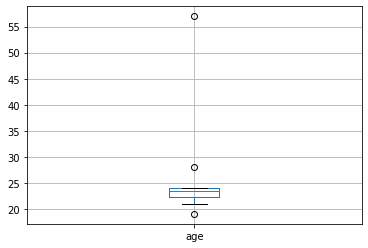

In [31]:
data.boxplot(column=["age"])

Sometimes, digital humanities and social sciences researchers don't have to clean the outliers. Instead, the research could go further by analyzing those outliers using domain knowledge. By explaining how the outliers form and what significances they have may give good perspectives or guide lines for further research.

If you need to clean the outliers, however, you can either manually clean they base on your need or try some techniques packaged by others. There are some packages (in Python and/or R) you can check for specific outlier detection requirements:
1. “Outliers”: contains some common tests used for detecting outliers such as rm.outlier (remove/replace values most different from the mean) and scores (calculates the normal, t, chi-square score of given data for identifying extreme value)
2. “OutlierDetection”: provides labeling of outliers based on model-based outlier detection, distance-based outlier detection, depth based outlier detection 
3. “HighDimsOut”: provides three high-dimensional outlier detection methods: Angels-Based Outlier Detection (ABOD), Subspace Outlier Detection (SOD) and feature bagging-based outlier detection (FBOD)

You can also refer to this post for more information: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba